<a href="https://colab.research.google.com/github/AmnaShaheena/Machine-Learning-CSH4144-Practical/blob/main/Day08_NBC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import pandas as pd

data=pd.read_csv('/content/advertising (1).csv')

In [44]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


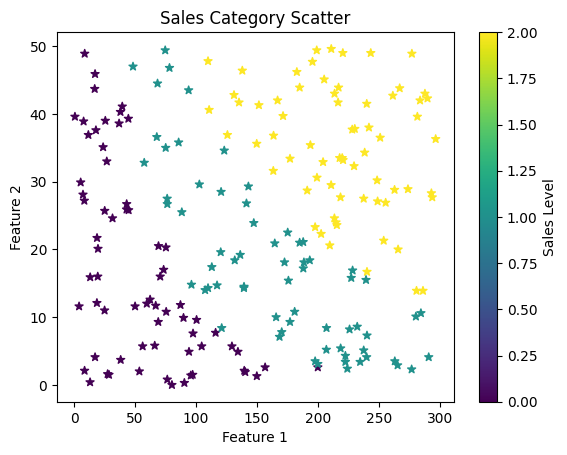

In [61]:
X = data.drop('Sales', axis=1)
y = pd.qcut(data['Sales'], q=3, labels=['Low', 'Medium', 'High']).map({'Low': 0, 'Medium': 1, 'High': 2})

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='viridis', marker='*')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Sales Category Scatter')
plt.colorbar(label='Sales Level')
plt.show()


In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [47]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [48]:
y_pred = model.predict(X_test)

In [49]:
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    ConfusionMatrixDisplay
)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')


print('Accuracy Score:',accuracy)
print('F1 Score:',f1)

Accuracy Score: 0.825
F1 Score: 0.8282163742690057


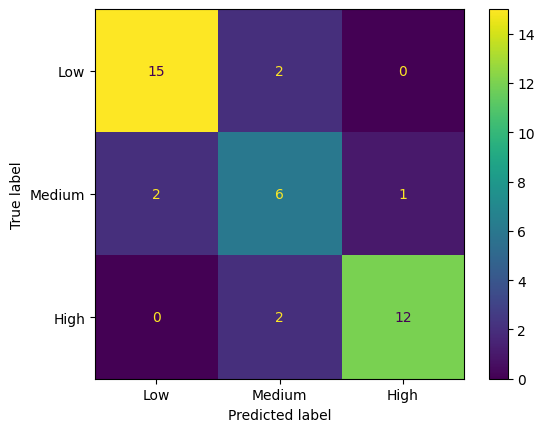

In [50]:
labels=['Low', 'Medium', 'High']
cm=confusion_matrix(y_test,y_pred,labels=labels)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
disp.plot()